In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv
/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv
/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_sample_submission.csv


In [2]:
train_set = pd.read_csv('/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv')
test_set = pd.read_csv('/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv')

In [3]:
train_set = train_set[:200000]

In [4]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [5]:
# remove stopwords from train and test set
train_set['review_text'] = train_set['review_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

test_set['review_text'] = test_set['review_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

In [6]:
from keras.preprocessing.text import Tokenizer
#fit tokenizer on training set
vocab_size = 5000
tokens = Tokenizer(num_words = vocab_size ,filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~' , lower = True)
tokens.fit_on_texts(train_set['review_text'].values)
word_indexes = tokens.word_index
print(len(word_indexes))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

170832


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# tokenize train set and categorize labels (Train set)
X = tokens.texts_to_sequences(train_set['review_text'].values)
X = pad_sequences(X , maxlen = 250)
y = to_categorical(train_set['rating'] , num_classes = 6)

X_eval, y_eval = X[-100001:], y[-100001:]
X, y = X[:-100000], y[:-100000]

# split to train and eval set (Train set)
X_train ,X_valid , y_train , y_valid = train_test_split(X , y ,test_size = 0.3 ,random_state = 42)

In [8]:
# tokenze test set ( Test set)
X_eval_final = tokens.texts_to_sequences(test_set['review_text'].values)
X_eval_final = pad_sequences(X_eval_final , maxlen = 250 )

# layers

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten, SimpleRNN, LSTM, Input, GRU, InputLayer, GlobalMaxPooling1D

In [10]:

activation_functions = ['sigmoid' , 'relu' , 'tanh']
two_layer_histories = []

for funct in activation_functions:
    model_layer_1 = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(6, activation='softmax')        
    ])
    
    model_layer_1.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
    history_layer_1 = model_layer_1.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
    
    results_layer_1 = model_layer_1.evaluate(X_eval, y_eval)
    
    two_layer_histories.append(results_layer_1)
    

Epoch 1/5
2188/2188 [==============================] - 9s 3ms/step - loss: 1.4930 - accuracy: 0.3238 - val_loss: 1.4347 - val_accuracy: 0.3434
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.3114 - accuracy: 0.4296 - val_loss: 1.2337 - val_accuracy: 0.4665
Epoch 3/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1984 - accuracy: 0.4797 - val_loss: 1.1998 - val_accuracy: 0.4740
Epoch 4/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1644 - accuracy: 0.4922 - val_loss: 1.1865 - val_accuracy: 0.4786
Epoch 5/5
3126/3126 [==============================] - 6s 2ms/step - loss: 1.1844 - accuracy: 0.4768
Epoch 1/5
2188/2188 [==============================] - 10s 4ms/step - loss: 1.3351 - accuracy: 0.4004 - val_loss: 1.1569 - val_accuracy: 0.4822
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1022 - accuracy: 0.5115 - val_loss: 1.1200 - val_accuracy: 0.5040
Epoch 3/5
2188/2188 [===================

In [11]:
three_layer_histories = []

for funct in activation_functions:
    model_layer_2 = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(6, activation='softmax')        
    ])
    
    model_layer_2.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
    history_layer_2 = model_layer_2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
    
    results_layer_2 = model_layer_2.evaluate(X_eval, y_eval)
    
    three_layer_histories.append(results_layer_2)



Epoch 1/5
2188/2188 [==============================] - 10s 4ms/step - loss: 1.4654 - accuracy: 0.3456 - val_loss: 1.4436 - val_accuracy: 0.3434
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.4105 - accuracy: 0.3791 - val_loss: 1.3363 - val_accuracy: 0.4343
Epoch 3/5
2188/2188 [==============================] - 8s 3ms/step - loss: 1.2870 - accuracy: 0.4504 - val_loss: 1.2772 - val_accuracy: 0.4541
Epoch 4/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.2332 - accuracy: 0.4806 - val_loss: 1.2467 - val_accuracy: 0.4667
Epoch 5/5
3126/3126 [==============================] - 6s 2ms/step - loss: 1.2265 - accuracy: 0.4742
Epoch 1/5
2188/2188 [==============================] - 10s 4ms/step - loss: 1.5449 - accuracy: 0.3457 - val_loss: 1.4719 - val_accuracy: 0.3434
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.4582 - accuracy: 0.3468 - val_loss: 1.4511 - val_accuracy: 0.3434
Epoch 3/5
2188/2188 [==================

In [12]:
four_layer_histories = []

for funct in activation_functions:
    model_layer_3 = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(6, activation='softmax')        
    ])
    
    model_layer_3.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
    history_layer_3 = model_layer_3.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
    
    results_layer_3 = model_layer_3.evaluate(X_eval, y_eval)
    
    four_layer_histories.append(results_layer_3)



Epoch 1/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.4945 - accuracy: 0.3253 - val_loss: 1.4449 - val_accuracy: 0.3434
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.4237 - accuracy: 0.3783 - val_loss: 1.3674 - val_accuracy: 0.4366
Epoch 3/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.3259 - accuracy: 0.4543 - val_loss: 1.3279 - val_accuracy: 0.4417
Epoch 4/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.2831 - accuracy: 0.4642 - val_loss: 1.2998 - val_accuracy: 0.4402
Epoch 5/5
3126/3126 [==============================] - 6s 2ms/step - loss: 1.2762 - accuracy: 0.4477
Epoch 1/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.3517 - accuracy: 0.3826 - val_loss: 1.2041 - val_accuracy: 0.4490
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.1772 - accuracy: 0.4666 - val_loss: 1.1762 - val_accuracy: 0.4692
Epoch 3/5
2188/2188 [====================

In [13]:
tanh_results = [two_layer_histories[0][1], three_layer_histories[0][1], four_layer_histories[0][1]]
relu_results = [two_layer_histories[1][1], three_layer_histories[1][1], four_layer_histories[1][1]]
sigmoid_results = [two_layer_histories[2][1], three_layer_histories[2][1], four_layer_histories[2][1]]

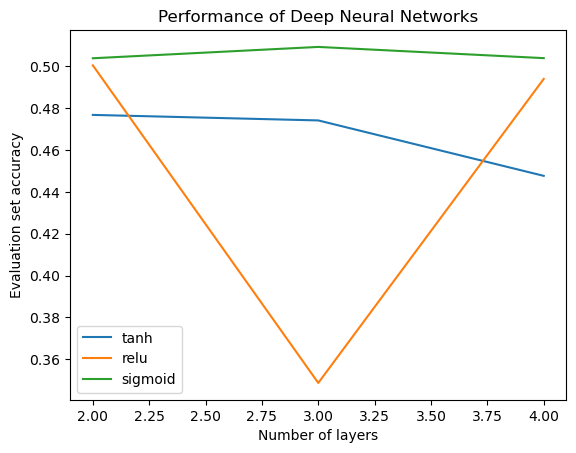

In [14]:
import matplotlib.pyplot as plt

layers = [2, 3, 4]
# plot
plt.figure()
plt.plot(layers, tanh_results, label='tanh')
plt.plot(layers, relu_results, label='relu')
plt.plot(layers, sigmoid_results, label='sigmoid')
plt.xlabel('Number of layers')
plt.ylabel('Evaluation set accuracy')
plt.legend()
plt.title('Performance of Deep Neural Networks')
plt.savefig('deep-nn.png')
plt.show()